In [16]:
import pandas as pd
import plotly.express as px
from datetime import datetime, time
import pytz
import numpy as np


In [17]:
# 1. Load and clean data
apps_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_GooglePlaystore.csv")
apps_df = apps_df.dropna(subset=['Installs', 'Category'])
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

In [18]:
# 2. Time check function
def is_display_time():
    ist = pytz.timezone('Asia/Kolkata')
    current_time = datetime.now(ist).time()
    return time(18, 0) <= current_time <= time(20, 0)

In [19]:
# 3. Filter categories
def prepare_data():
    # Exclude categories starting with A/C/G/S
    filtered = apps_df[~apps_df['Category'].str.startswith(('A', 'C', 'G', 'S'), na=False)]
    
    # Get top 5 categories
    top_cats = filtered.groupby('Category')['Installs'].sum().nlargest(5).index
    filtered = filtered[filtered['Category'].isin(top_cats)]
    
    # Add dummy country data
    countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Japan', 
             'Germany', 'France', 'China', 'Russia', 'Mexico']
    filtered['Country'] = np.random.choice(countries, size=len(filtered))
    
    # Aggregate data
    map_data = filtered.groupby(['Country', 'Category'])['Installs'].sum().reset_index()
    map_data['Highlight'] = map_data['Installs'] > 1000000
    
    return map_data

In [20]:
# 4. Create Choropleth map with proper highlighting
'''def create_map():
    if not is_display_time():
        print("Map only available between 6-8 PM IST")
        return None
    
    data = prepare_data()
    
    # Create figure with custom data for highlighting
    fig = px.choropleth(
        data,
        locations="Country",
        locationmode="country names",
        color="Installs",
        hover_name="Category",
        animation_frame="Category",
        #custom_data=["Installs"],  # Include installs in customdata
        color_continuous_scale=px.colors.sequential.Plasma,
        scope="world",
        title="Global Installs by Top 5 Categories (Excluding A/C/G/S starters)",
        height=600
    )
    
    


    
    # Proper highlighting implementation
    for frame in fig.frames:
        if frame.data and len(frame.data) > 0:
            highlight_colors = [
                'gold' if inst[0] > 1000000 else 'rgba(0,0,0,0)'
                for inst in frame.data[0].customdata
            ]
            frame.data[0].update(
                marker_line_width=2,
                marker_line_color=highlight_colors
            )
    
    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True),
        margin={"r":0,"t":50,"l":0,"b":0}
    )
    
    return fig'''

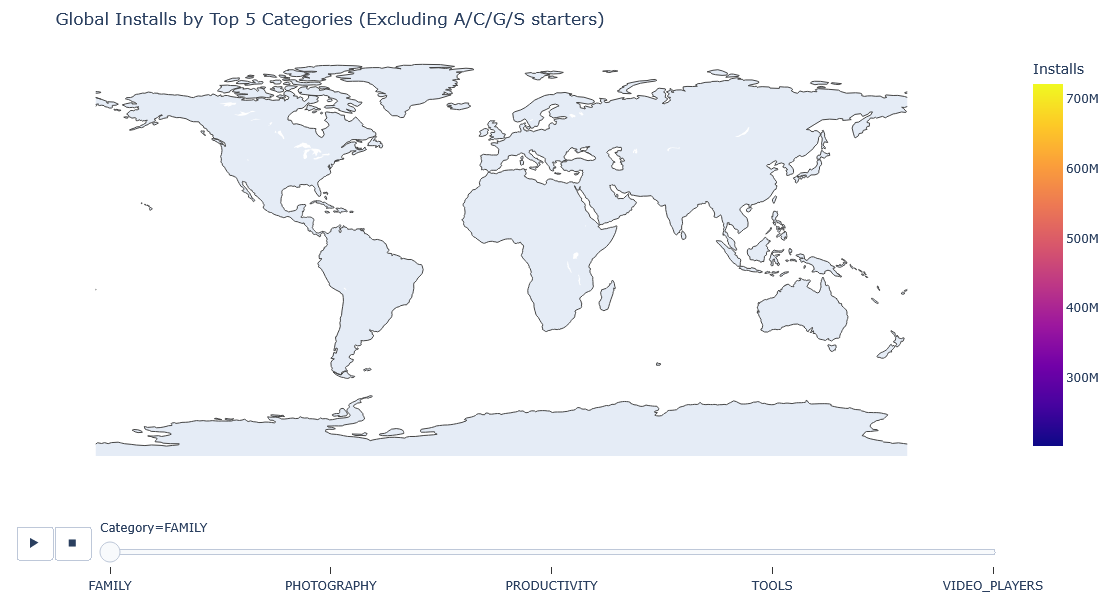

In [21]:
# 5. Display conditionally
'''if is_display_time():
    fig = create_map()
    if fig:
        fig.show()
else:
    print("Visualization only available between 6-8 PM IST")'''